# Homework 1
---------------------------------------------------------------------
## CIS 600 Fundamental Data & Knowledge Mining
## Prof. Ying Lin
## 10/25/2022

### Anthony Redamonti
### Syracuse University

### Introduction 
The following project was implemented in Jupyter Notebooks using Anaconda 3 with Python 3 (ipykernel).
The goal of the project is below.

Analyze the dataset provided in the file "employee_attrition.csv."
Follow the CRISP-DM process and conduct Exploratory Data Analysis (EDA).
  - Data preprocessing and cleaning.
  - Data transformation and preparation.
  - Conduct exploratory data analysis (EDA)

### Section 1: Data Preprocessing and Cleaning
- Remove Homogeneous Features (Columns)
- Remove Outliers
- Remove Entries with Missing Data
- Remove Duplicate Entries
- Remove Null Entries

In [41]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as mtpltlib

data = pd.read_csv('employee_attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,30,No,Travel_Rarely,1358,Sales,16.0,1,Life Sciences,1,1479,...,3.0,80,2,4.0,2,2,2,1,2.0,2
1,52,No,Travel_Rarely,1325,Research & Development,11.0,4,Life Sciences,1,813,...,2.0,80,1,9.0,3,3,5,2,1.0,4
2,42,No,Travel_Rarely,462,Sales,14.0,2,Medical,1,936,...,1.0,80,0,10.0,6,3,5,4,0.0,3
3,55,No,Non-Travel,177,Research & Development,8.0,1,Medical,1,1278,...,4.0,80,1,34.0,3,3,33,9,15.0,0
4,35,No,Travel_Rarely,1029,Research & Development,16.0,3,Life Sciences,1,1529,...,4.0,80,0,11.0,3,1,11,8,3.0,3


In [42]:
print("(Rows, Columns): ", data.shape)

(Rows, Columns):  (1176, 35)


#### Section 1.1: Remove Homogeneous Features (Columns)
The data contained in each feature should have significance.
A feature should not have the same data for all entries.
Therefore, the function removeHomogeneousFeatures will check the number of unique entries in each feature. 
If the feature only has one unique entry, it will be removed from the dataset.

In [43]:
# remove columns with homogeneous data (if unique entries == 1)
def removeHomogeneousFeatures(dataframe):
    for feature in dataframe.columns:
        uniqueEntries = (dataframe[feature].unique())
        if(len(uniqueEntries) == 1):
            dataframe.drop(feature, inplace = True, axis = 1)
            print(feature + " feature has been dropped.")

removeHomogeneousFeatures(data)
print("(Rows, Columns): ", data.shape)

EmployeeCount feature has been dropped.
Over18 feature has been dropped.
StandardHours feature has been dropped.
(Rows, Columns):  (1176, 32)


"EmployeeCount," "StandardHours," and "Over18" features have been dropped.

#### Section 1.2: Remove Outliers

Certain features must be checked for outliers.
1. Find the indices of the outliers for each feature in the feature list.
2. Remove the outliers using their indices.

In [44]:
# function that returns a list of indices of outliers
# arguments are the original dataset and the selected feature (column)
def findOutlierIndices(dataframe, inputFeatureList):
    
    outlierList = []
    
    for feature in inputFeatureList:
        quantile1 = dataframe[feature].quantile(0.25)
        quantile3 = dataframe[feature].quantile(0.75)
        interquartileRange = quantile3 - quantile1
        lowerThreshhold = quantile1 - (1.5 * interquartileRange)
        upperThreshhold = quantile3 + (1.5 * interquartileRange)
        
        index = 0
    
        # search the feature for outliers
        while(index < len(dataframe) - 1):
            value = dataframe._get_value(index, feature)
            if((value < lowerThreshhold) or (value > upperThreshhold)):
                outlierList.append(index)
            index = index + 1
    
    # remove repeating indices.
    outlierList = sorted(set(outlierList))
    return outlierList

# Define a list of features that may have outliers. 
featureList = ['Age', 'YearsWithCurrManager', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 
               'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
              'YearsInCurrentRole', 'YearsSinceLastPromotion']

# Find the indices of the outliers in the dataset.
outlierIndexList = findOutlierIndices(data, featureList)
print("Total numnber of outliers found: ", len(outlierIndexList))

Total numnber of outliers found:  288


In [45]:
# Remove the outliers using the outlier index list
def removeOutliers(dataframe, inputOutlierIndexList):
    dataframe = dataframe.drop(inputOutlierIndexList)
    return dataframe

newDataframe = removeOutliers(data, outlierIndexList)
print("(Rows, Columns): ", newDataframe.shape)

(Rows, Columns):  (888, 32)


288 entries were found to be outliers. They have all been removed from the dataset.

#### Section 1.3: Remove Entries with Missing Data
All entries must be checked for missing data. If an entry contains missing data, it will be removed from the dataset.

In [46]:
# drop the entries that contain missing data (NA)
newDataframe.dropna(inplace=True)
print("(Rows, Columns): ", newDataframe.shape)

(Rows, Columns):  (883, 32)


A total of 5 entries were found to have missing data and were removed from the dataset.

#### Section 1.4: Remove Duplicate Entries
All duplicate entries must be removed from the dataset.

In [47]:
# drop all duplicate entries.
newDataframe.drop_duplicates(inplace = True)
print("(Rows, Columns): ", newDataframe.shape)

(Rows, Columns):  (883, 32)


No duplicate entries were found.

#### Section 1.5: Remove Null Entries
All entries that contain a null value will be dropped.

In [48]:
newDataframe.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

None of the entries contain null values. 

### Section 2: Data Transformation and Preparation
- Binary Format
- Nominal Attributes: One-Hot Encoding

#### Section 2.1: Binary Format
The data in the "Attrition" feature must be tranformed to binary format instead of Yes/No. The same will be done for the "Gender" feature (0 = Female, 1 = Male).

In [49]:
transformedDataframe = newDataframe.copy()

transformedDataframe['Attrition'] = transformedDataframe['Attrition'].replace("No", 0)
transformedDataframe['Attrition'] = transformedDataframe['Attrition'].replace("Yes", 1)
transformedDataframe['Gender'] = transformedDataframe['Gender'].replace("Female", 0)
transformedDataframe['Gender'] = transformedDataframe['Gender'].replace("Male", 1)
transformedDataframe.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,30,0,Travel_Rarely,1358,Sales,16.0,1,Life Sciences,1479,4,...,3.0,3.0,2,4.0,2,2,2,1,2.0,2
1,52,0,Travel_Rarely,1325,Research & Development,11.0,4,Life Sciences,813,4,...,4.0,2.0,1,9.0,3,3,5,2,1.0,4
2,42,0,Travel_Rarely,462,Sales,14.0,2,Medical,936,3,...,3.0,1.0,0,10.0,6,3,5,4,0.0,3
4,35,0,Travel_Rarely,1029,Research & Development,16.0,3,Life Sciences,1529,4,...,3.0,4.0,0,11.0,3,1,11,8,3.0,3
7,23,0,Travel_Rarely,507,Research & Development,20.0,1,Life Sciences,1533,1,...,3.0,2.0,0,5.0,2,3,4,3,1.0,2


#### Section 2.2: Nominal Attributes: One-Hot Encoding
The data that is nominal will be transformed using one-hot encoding. The following columns will be one-hot encoded: Department, BusinessTravel, EducationField, JobRole, and MaritalStatus.

In [50]:
# concatenate the one-hot encoding to the original dataframe
newDepartments = pd.get_dummies(transformedDataframe.Department, prefix='Department')
transformedDataframe = pd.concat([transformedDataframe, newDepartments], axis = 1)
newBusinessTravel = pd.get_dummies(transformedDataframe.BusinessTravel, prefix='BusinessTravel')
transformedDataframe = pd.concat([transformedDataframe, newBusinessTravel], axis = 1)
newEducationField = pd.get_dummies(transformedDataframe.EducationField, prefix='EducationField')
transformedDataframe = pd.concat([transformedDataframe, newEducationField], axis = 1)
newJobRole = pd.get_dummies(transformedDataframe.JobRole, prefix='JobRole')
transformedDataframe = pd.concat([transformedDataframe, newJobRole], axis = 1)
newMaritalStatus = pd.get_dummies(transformedDataframe.MaritalStatus, prefix='MaritalStatus')
transformedDataframe = pd.concat([transformedDataframe, newMaritalStatus], axis = 1)

# remove old nominal columns
nominalFeatureList = ['Department', 'BusinessTravel', 'EducationField', 'JobRole', 'MaritalStatus']
for feature in nominalFeatureList:
    transformedDataframe.drop(feature, inplace = True, axis = 1)

transformedDataframe.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,30,0,1358,16.0,1,1479,4,1,96,3,...,0,0,0,0,0,1,0,0,1,0
1,52,0,1325,11.0,4,813,4,0,82,3,...,1,0,0,0,0,0,0,0,1,0
2,42,0,462,14.0,2,936,3,0,68,2,...,0,0,0,0,0,1,0,0,0,1
4,35,0,1029,16.0,3,1529,4,0,91,2,...,0,0,0,0,0,0,0,0,0,1
7,23,0,507,20.0,1,1533,1,1,97,3,...,1,0,0,0,0,0,0,0,0,1


The original nominal features have been removed and replaced by their one-hot encoded columns. Thus, the number of features has increased to 51.

### Section 3: Exploratory Data Analysis
- The exploratory data analysis will be divided into three parts: 
    - Histogram Analysis
    - Correlation Analysis using Heatmap
    - Descriptive Analysis

The histograms will aid in determining the attributes of interest.
The attributes of interest will be checked for having correlations with attrition using a heatmap.
Descriptive analysis will be used to contruct a filter based on the histogram analysis. 
The goal of the filter is to capture most of the entries with "Attrition == Yes." 

#### Section 3.1: Histogram Analysis
- Histogram analysis of all the attributes will be performed using attrition as the hue.

##### Histogram Analysis: Years In Current Role, Total Working Years, Distance From Home, and Environment Satisfaction

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Count'>

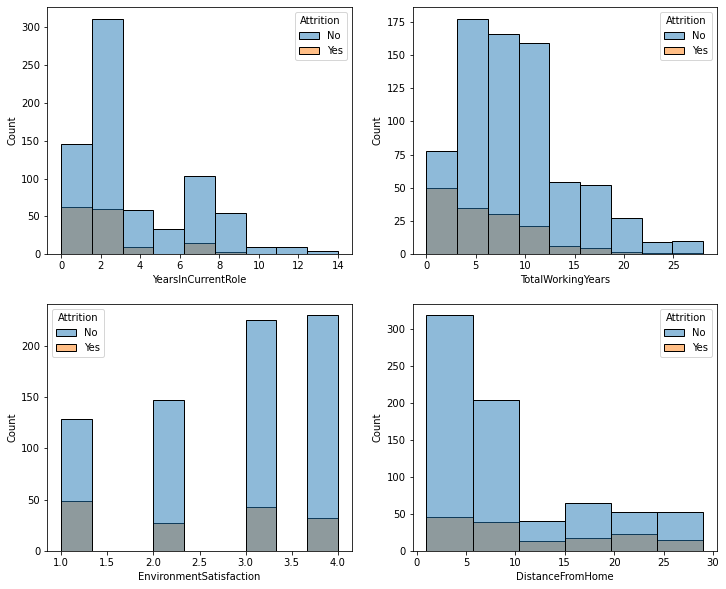

In [51]:
fig, axs = mtpltlib.subplots(2, 2, figsize=(12, 10))
sbn.histplot(data = newDataframe, x="YearsInCurrentRole", hue="Attrition", bins = 9, ax=axs[0, 0])
sbn.histplot(data = newDataframe, x="TotalWorkingYears", hue="Attrition", bins = 9, ax=axs[0, 1])
sbn.histplot(data = newDataframe, x="EnvironmentSatisfaction", hue="Attrition", bins = 9, ax = axs[1, 0])
sbn.histplot(data = newDataframe, x="DistanceFromHome", hue="Attrition", bins = 6, ax = axs[1, 1])

- Years In Current Role: Most of the attrition occurs from years 0-3 in the current role.
- Total Working Years: The rate of attrition is significantly high among employees with 0-3 total working years.
- Environment Satisfaction and Distance From Home: Neither greatly affects the level of attrition.  

##### Histogram Analysis: Daily Rate, Department, Age, and Monthly Income

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

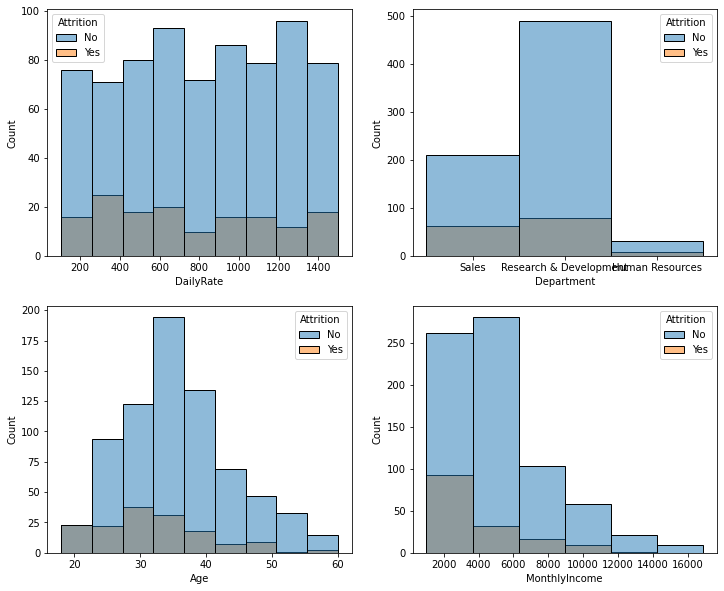

In [52]:
fig2, axs2 = mtpltlib.subplots(2, 2, figsize=(12, 10))
sbn.histplot(data = newDataframe, x="DailyRate", hue="Attrition", bins = 9, ax=axs2[0, 0])
sbn.histplot(data = newDataframe, x="Department", hue="Attrition", bins = 9, ax=axs2[0, 1])
sbn.histplot(data = newDataframe, x="Age", hue="Attrition", bins = 9, ax = axs2[1, 0])
sbn.histplot(data = newDataframe, x="MonthlyIncome", hue="Attrition", bins = 6, ax = axs2[1, 1])

- Age: Most of the attrition occurs between the ages of 18 and 39.
- Monthly Income: Most of the attrition occurs between the monthly income levels of 1,000 and 6,200.
- Daily Rate and Department: Neither greatly affect the level of attrition.

##### Histogram Analysis: Business Travel, Education, Gender, and Employee Number

<AxesSubplot:xlabel='EmployeeNumber', ylabel='Count'>

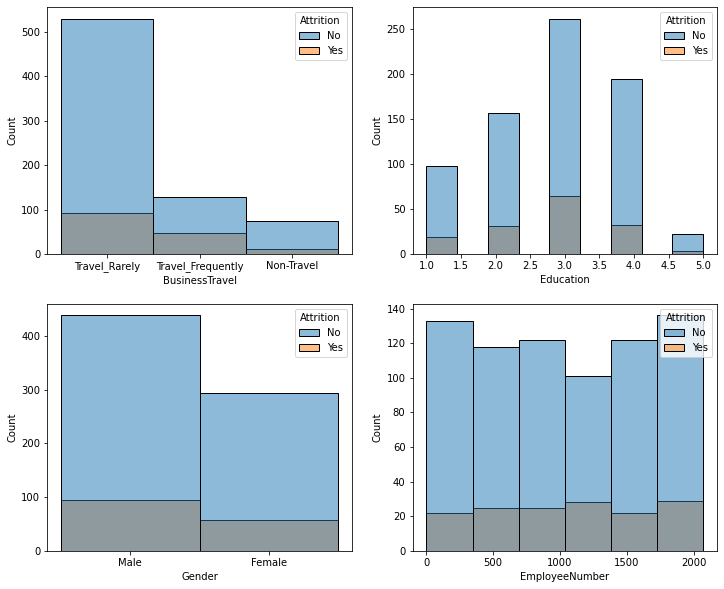

In [53]:
fig2, axs3 = mtpltlib.subplots(2, 2, figsize=(12, 10))
sbn.histplot(data = newDataframe, x="BusinessTravel", hue="Attrition", bins = 9, ax=axs3[0, 0])
sbn.histplot(data = newDataframe, x="Education", hue="Attrition", bins = 9, ax=axs3[0, 1])
sbn.histplot(data = newDataframe, x="Gender", hue="Attrition", bins = 9, ax = axs3[1, 0])
sbn.histplot(data = newDataframe, x="EmployeeNumber", hue="Attrition", bins = 6, ax = axs3[1, 1])

- Business Travel: Most of the attrition occurs with rare and frequent business travel. Non-travel has little attrition.
- Education: The majority of the attrition takes place between education levels 2 to 4.
- Gender: The attrition rates are fairly even among male and female genders. 
- Employee Number: As expected, there is no correlation between attrition and employee number.

##### Histogram Analysis: Hourly Rate, Job Involvement, Job Level, and Job Satisfaction

<AxesSubplot:xlabel='JobSatisfaction', ylabel='Count'>

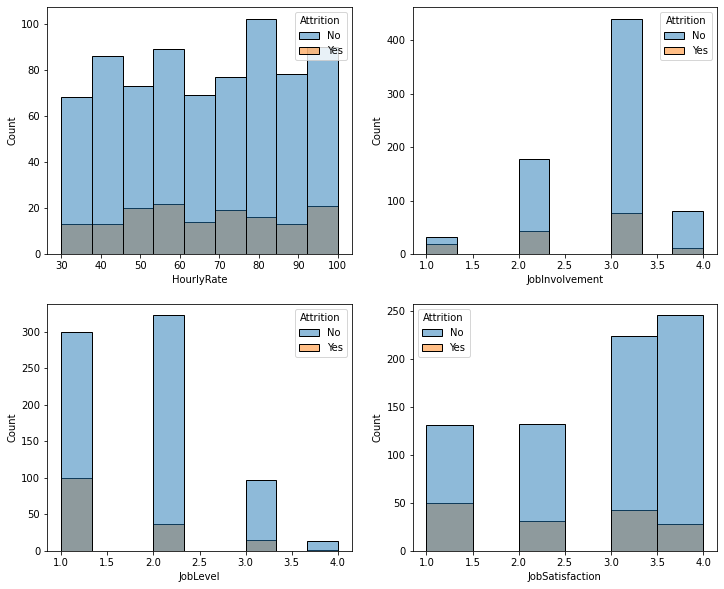

In [54]:
fig2, axs4 = mtpltlib.subplots(2, 2, figsize=(12, 10))
sbn.histplot(data = newDataframe, x="HourlyRate", hue="Attrition", bins = 9, ax=axs4[0, 0])
sbn.histplot(data = newDataframe, x="JobInvolvement", hue="Attrition", bins = 9, ax=axs4[0, 1])
sbn.histplot(data = newDataframe, x="JobLevel", hue="Attrition", bins = 9, ax = axs4[1, 0])
sbn.histplot(data = newDataframe, x="JobSatisfaction", hue="Attrition", bins = 6, ax = axs4[1, 1])

- Hourly Rate: There is no clear correlation between hourly rate and attrition.
- Job Involvement: The majority of attrition occures with job involvement ratings of 2 and 3. 
- Job Level: The attrition rates are highest with a job level of 1 and 2. 
- Job Satisfaction: Surprisingly, the job satisfaction has no clear correlation with attrition.

##### Histogram Analysis: Marital Status, Monthly Rate, Number of Companies Worked, and Overtime

<AxesSubplot:xlabel='OverTime', ylabel='Count'>

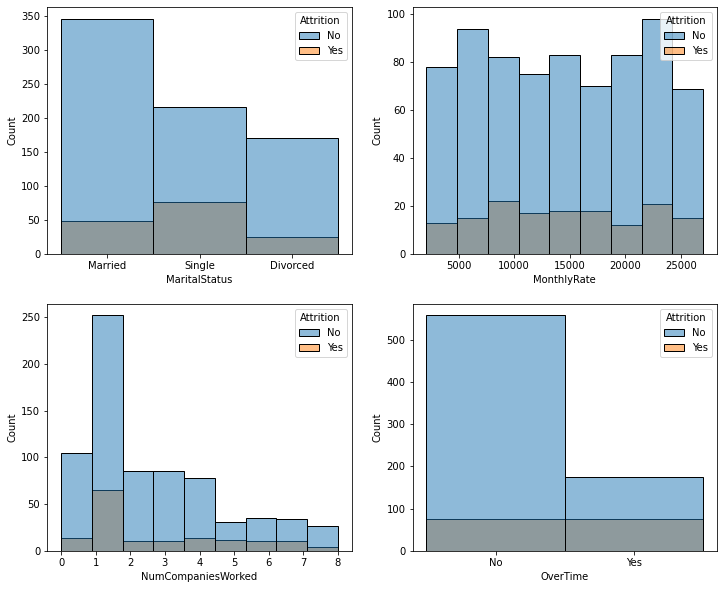

In [55]:
fig2, axs5 = mtpltlib.subplots(2, 2, figsize=(12, 10))
sbn.histplot(data = newDataframe, x="MaritalStatus", hue="Attrition", bins = 9, ax=axs5[0, 0])
sbn.histplot(data = newDataframe, x="MonthlyRate", hue="Attrition", bins = 9, ax=axs5[0, 1])
sbn.histplot(data = newDataframe, x="NumCompaniesWorked", hue="Attrition", bins = 9, ax = axs5[1, 0])
sbn.histplot(data = newDataframe, x="OverTime", hue="Attrition", bins = 6, ax = axs5[1, 1])

- Marital Status: Most of the attrition is associated with employees who are single or married. 
- Monthly Rate: There is no clear correlation with attrition and monthly rate.
- Number of Companies Worked: The attrition rates are highest from 1 to 2 companies worked. 
- Overtime: The attrition rates are higher for overtime employees than non-overtime employees. (Almost half of the overtime employees leave.)

##### Histogram Analysis: Percent Salary Hike, Performance Rating, Relationship Satisfaction, and Stock Option Level

<AxesSubplot:xlabel='StockOptionLevel', ylabel='Count'>

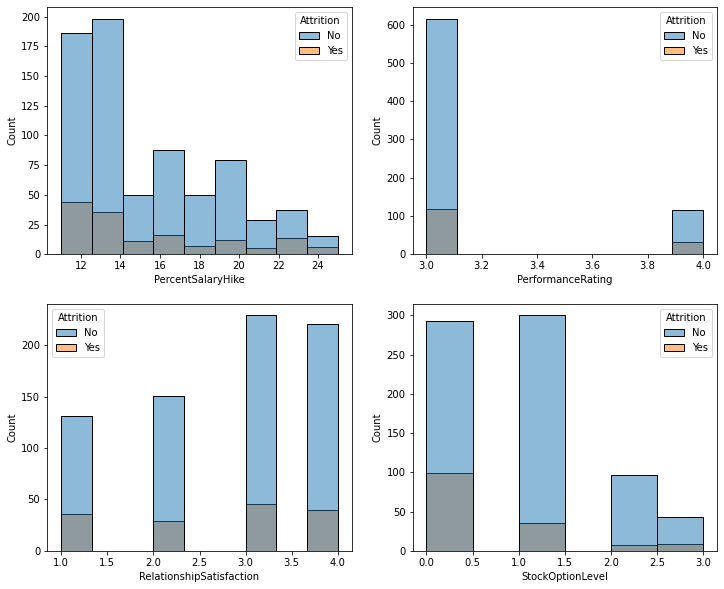

In [56]:
fig2, axs6 = mtpltlib.subplots(2, 2, figsize=(12, 10))
sbn.histplot(data = newDataframe, x="PercentSalaryHike", hue="Attrition", bins = 9, ax=axs6[0, 0])
sbn.histplot(data = newDataframe, x="PerformanceRating", hue="Attrition", bins = 9, ax=axs6[0, 1])
sbn.histplot(data = newDataframe, x="RelationshipSatisfaction", hue="Attrition", bins = 9, ax = axs6[1, 0])
sbn.histplot(data = newDataframe, x="StockOptionLevel", hue="Attrition", bins = 6, ax = axs6[1, 1])

- Percent Salary Hike: The largest rates of attrition take place from 5 to 15% salary hike (lower end of the graph).
- Performance Rating: There is no clear correlation between attrition and performance rating.
- Relationship Satisfaction: There is no clear pattern between relationship satisfaction and attrition.
- Stock Option Level: The bulk of the attrition is seen with stock option levels ranging from 0 to 1.

##### Histogram Analysis: Training Times Last Year, Work Life Balance, Years at Company, and Years Since Last Promotion

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Count'>

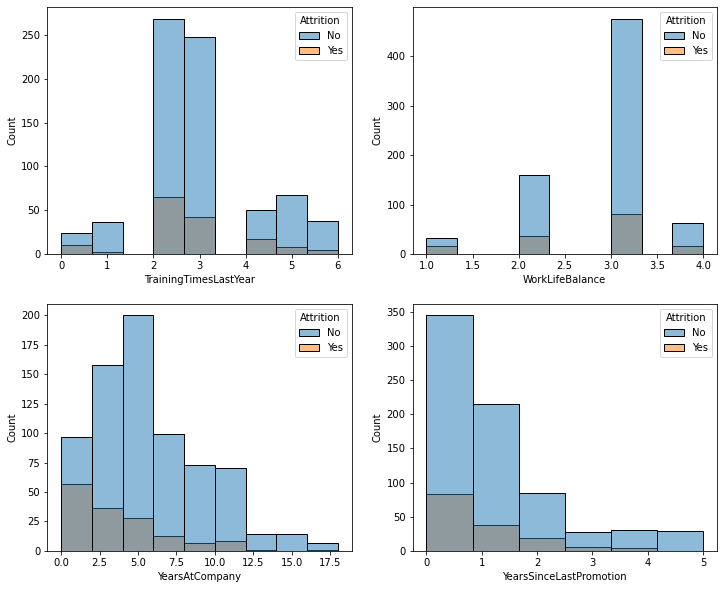

In [57]:
fig2, axs7 = mtpltlib.subplots(2, 2, figsize=(12, 10))
sbn.histplot(data = newDataframe, x="TrainingTimesLastYear", hue="Attrition", bins = 9, ax=axs7[0, 0])
sbn.histplot(data = newDataframe, x="WorkLifeBalance", hue="Attrition", bins = 9, ax=axs7[0, 1])
sbn.histplot(data = newDataframe, x="YearsAtCompany", hue="Attrition", bins = 9, ax = axs7[1, 0])
sbn.histplot(data = newDataframe, x="YearsSinceLastPromotion", hue="Attrition", bins = 6, ax = axs7[1, 1])

- Training Times Last Year: Most of the attrition occurs between 2-3 training times last year.
- Work Life Balance: The majority of the attrition takes place between levels 2-3 on the scale. 
- Years at Company: The attrition rates are highest from 0-7 years at the company. 
- Years since Last Promotion: The bulk of attrition occurs from 0 to 2 years since the last promotion.

##### Histogram Analysis: Years with Current Manager

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Count'>

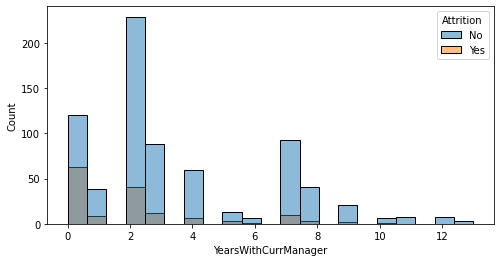

In [58]:
mtpltlib.figure(figsize=(8,4))
sbn.histplot(data = newDataframe, x="YearsWithCurrManager", hue="Attrition")

- Years with Current Manager: Most of the attrition occurs between 0-3 years under the current manager. 

##### Histogram Analysis: Job Role

<AxesSubplot:xlabel='JobRole', ylabel='Count'>

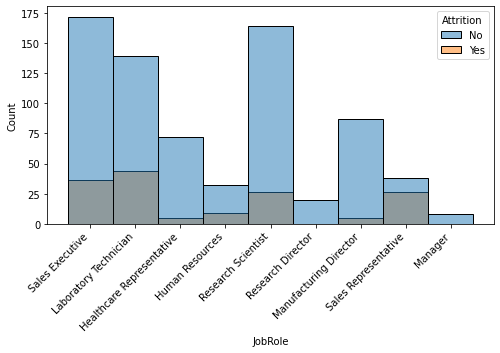

In [59]:
mtpltlib.figure(figsize=(8,4))
mtpltlib.xticks(rotation=45, horizontalalignment='right')
sbn.histplot(data = newDataframe, x="JobRole", hue="Attrition")

- Job Role: The attrition rate of Sales Representative is alarmingly high. 

##### Histogram Analysis: Education Field

<AxesSubplot:xlabel='EducationField', ylabel='Count'>

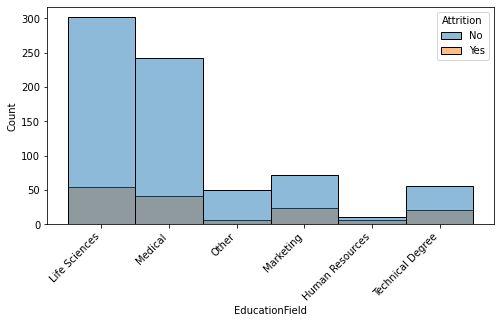

In [60]:
mtpltlib.figure(figsize=(8,4))
mtpltlib.xticks(rotation=45, horizontalalignment='right')
sbn.histplot(data = newDataframe, x="EducationField", hue="Attrition")

- Education Field: Most of the attrition seems to be occuring in the Life Sciences and Medical fields. 

#### Section 3.2: Heatmap Analysis
The histogram analysis revealed several key attributes with respect to attrition: 
- Sales Department
- Years Since Last Promotion
- Research & Development Department
- Total Working Years
- JobRole_Sales Representative

A new dataset named "importantAttributes" is created using these 5 attributes along with the attrition attribute.
A heatmap is used to plot the correlation between these key attributes.

<AxesSubplot:>

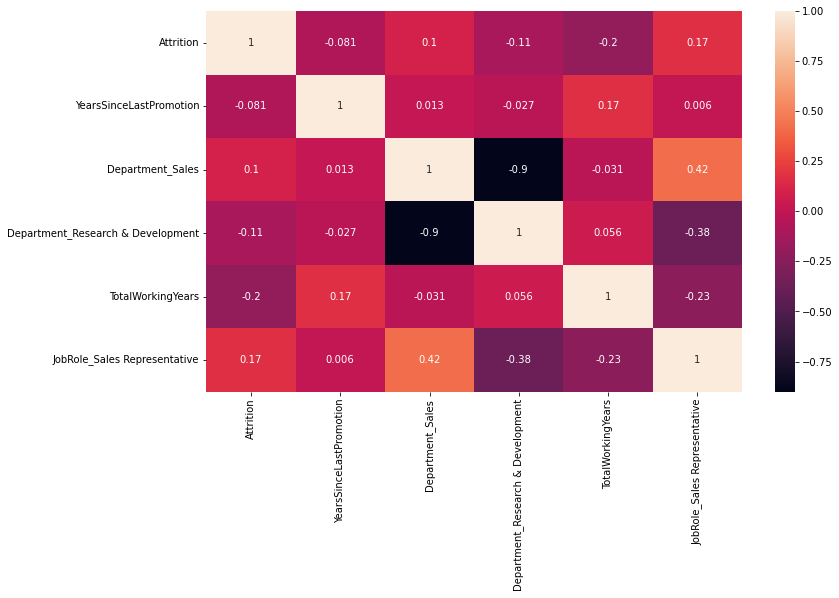

In [61]:
importantAttributes = transformedDataframe[['Attrition', 'YearsSinceLastPromotion', 'Department_Sales', 'Department_Research & Development', 'TotalWorkingYears', 'JobRole_Sales Representative']]
mtpltlib.figure(figsize=(12,7))
correlation = importantAttributes.corr()
sbn.heatmap(correlation, annot = True)

The heatmap reveals that the job role of sales representative and the department of sales have a positive correlation with attrition.

#### Section 3.3: Descriptive Analysis
Descriptive analysis will be performed by constructing a filter that targets the attributes of interest. The objective is to capture most of the entries with positive attrition.
- Based on the findings in the histogram analysis, the descriptive filter will have the following characteristics:
    - Department: Sales or Research & Development
    - Years Since Last Promotion: 0-2

In [62]:
# all of the entries captured using the descriptive filter
filteredDataset = transformedDataframe[(transformedDataframe['Attrition'] == 1) & 
                                       (((transformedDataframe['YearsSinceLastPromotion'] >= 0) & 
                                       (transformedDataframe['YearsSinceLastPromotion'] <= 2)) &
                                       ((transformedDataframe['Department_Sales'] == 1) | 
                                       (transformedDataframe['Department_Research & Development'] == 1)))]   

# all of the entries will attribute Attrition == Yes
allAttritionEntries = transformedDataframe[(transformedDataframe['Attrition'] == 1)]

print("The number of entries captured by the filter: ", len(filteredDataset))
print("The number of entries missed by the filter: ", len(allAttritionEntries) - len(filteredDataset))
print("Descriptive Filter Performance:", '{:.2%}'.format(len(filteredDataset) / len(allAttritionEntries)))

The number of entries captured by the filter:  132
The number of entries missed by the filter:  19
Descriptive Filter Performance: 87.42%


The descriptive filter was able to capture 87.42% of all entries with attrition. The attributes used in the filter were selected by analyzing each attribute's histogram with attrition as the hue. Analyzing the change in attrition in each attribute's histogram provided insight into which attributes to use in the filter.

### 87.42% of the entries with "Attrition == Yes" have the following in common:
- It has been 0 to 2 years since their last promotion.
- Their department is "Sales" or "Research & Development."